## Notebook d'Antoine - Copie de Marc

## 1) import usefuls module

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 

from itertools import groupby
from helpers import *
from helpers_marc import *
from plots import *
import scipy
import scipy.io
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2

## 2) Load the data

In [2]:
# write here the path to the dataset
path_dataset = "datasets/data_train.csv"

# load the data 
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


## 3) Split the data 

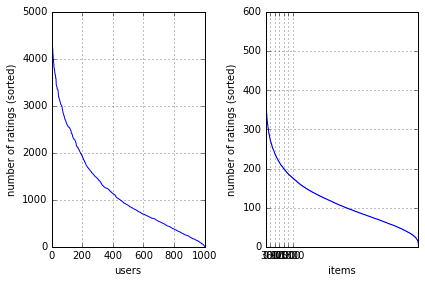

In [3]:
# First get the numbers of ratings per user and ratings per film 
# And plot these values

num_items_per_user, num_users_per_item = plot_raw_data(ratings)


Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:236194
Total number of nonzero elements in test data:940679


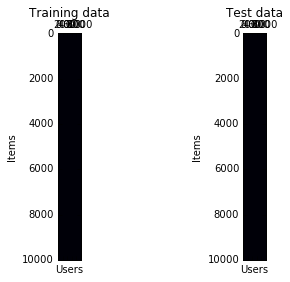

In [4]:
# then select the items and users for which there are enough data
# and split the datan into a training set and a test set

# minimal number of data per user and per item
min_num_ratings = 10 

# fraction of the data set that will be the test set 
p_test = 0.8

valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test)
# plot the resulting training and test set 
plot_train_test_data(train, test)

In [5]:
print(type(train))
initial_train = train.todense()

<class 'scipy.sparse.lil.lil_matrix'>


#### Reinitialize the Matrix before Factorization

In [19]:
def reinitialize(initial_train, gen_train):
    gen_train[initial_train > 0] = 0
    return initial_train + gen_train

## 4) Matrix Factorization through Stochastic Gradient Descent 

In [29]:
from sklearn.decomposition import NMF
import copy


model = NMF(max_iter=10, verbose=1, alpha=0.02, tol=0.005, init='random', random_state=0)
#predicted_train = model.fit_transform(train)
gen_train = copy.deepcopy(initial_train)
gen_train[gen_train == 0] = 4.09
print(gen_train[:8,:8])
gen_train = model.fit_transform(gen_train)
gen_train = reinitialize(initial_train, gen_train)
print(gen_train[:8,:8])
for i in range(4):
    gen_train = model.fit_transform(gen_train)
    gen_train = reinitialize(initial_train, gen_train)
    



[[ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.09  2.    4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.09  4.09  4.09  4.09  4.09  5.    4.09  4.09]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]
 [ 4.09  4.09  4.09  4.09  4.09  4.09  4.09  4.09]]
('violation:', 1.0)
('violation:', 0.05881890942386996)
('violation:', 0.03943260222094166)
('violation:', 0.03141480565111298)
('violation:', 0.02722503173938012)
('violation:', 0.024626895019697108)
('violation:', 0.023596183879607113)
('violation:', 0.020325109402143444)
('violation:', 0.01815725762125298)
('violation:', 0.016558645390479063)
[[ 14.72834792   8.41251489   4.65032534   2.38893026   0.89854697
    1.01441677   0.38792298   0.14938941]
 [ 12.91650261   7.64862042   4.24876922   2.35691581   0.66724176
    0.81088091   0.29713221   0.09313202]
 [ 13.89752238   8.101416

In [26]:
print(gen_train[:8,:8])

[[ 0.          0.          0.07539269  0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          2.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          5.
   1.21110106  0.        ]
 [ 0.          0.          0.          0.          0.          0.13200563
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [

## 6) Prediction using Scikit Learn Library

In [ ]:
print(model.reconstruction_err_)
res = model.transform(test)

In [ ]:
mse = calculate_mse(test, res)
print(mse)

In [ ]:
print(res[0:10,0:10])
print(test[0:10,0:10])

In [ ]:
path_evaluation = "datasets/sampleSubmission.csv"
ratings_submit = load_data(path_evaluation)
evaluated_on = ratings_submit.toarray()
evaluated_on = evaluated_on.astype(np.float)

In [ ]:
matrix2file(filename, res, evaluated_on)

In [ ]:
# compute the csv file to store the results

filename = "datasets/result_antoine.csv"

matrix2file(filename, prediction, evaluated_on)